# Calcolare lo zero di una funzione

## Esercizio 1

Scrivere una funzione che implementi il metodo di Bisezione e una funzione per
il metodo di Newton per il calcolo dello zero di una funzione $f(x)$ per $x \in \mathbb{R}^n$.

Testare i due risolutori per risolvere

$$f (x) = e^x - x^2$$

la cui soluzione è $x^∗ = -0.7034674$. In particolare:
1. Le due funzioni devono calcolare l’errore $|x_k − x^∗|$ ad ogni iterazione.
2. Disegnare il grafico della funzione $f$ nell’intervallo $I = [-1, 1]$ e verificare che $x^∗$ sia lo zero di $f$ in $[−1, 1]$.
3. Calcolare lo zero della funzione utilizzando entrambe le funzioni precedentemente scritte
4. Confrontare l’accuratezza delle soluzioni trovate e il numero di iterazioni effettuate dai solutori.
5. Plottare l’errore al variare delle iterazioni per entrambi i metodi.

Valori esatti 
 xTrue = -0.7034674 
 yTrue = 4.2787469289873314e-08
Metodo di bisezione 
 x = -0.7034674225142226 
 iter_bise= 34 
 iter_max= 35
Metodo di Newton 
 x = -0.7034674224983917 
 iter_new= 7 
 err_new= [1.00000000e+00 2.15612056e+00 7.28452887e-01 2.06633270e-01
 1.74460854e-02 1.20892167e-04 5.78346016e-09]


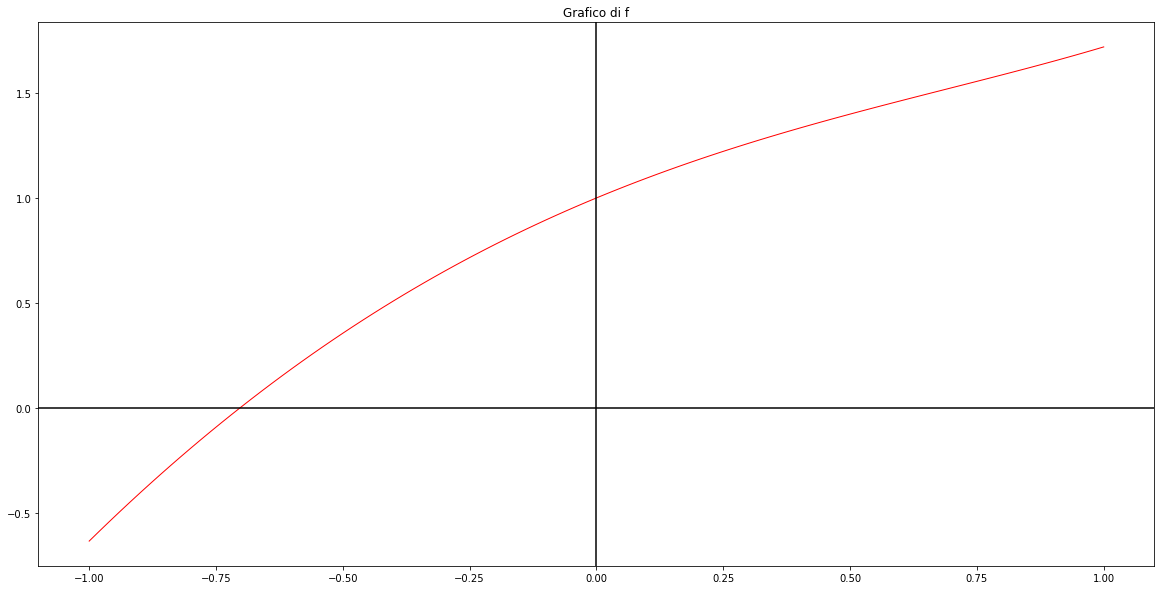

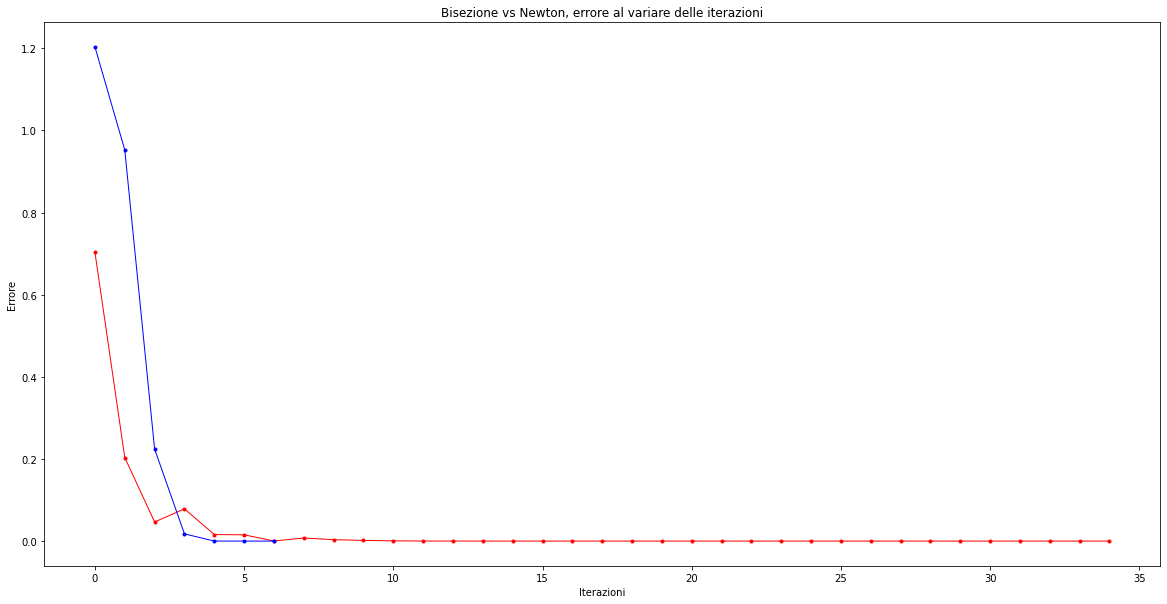

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib


# Metodo di Bisezione
def bisezione(a, b, f, tolx, xTrue):
    k = math.ceil(math.log2((b - a) / tolx))              # numero minimo di iterazioni per avere un errore minore di tolx
    
    vecErrore = np.zeros( (k, 1) )

    if f(a) * f(b) > 0:
        print("Non esiste uno zero di funzione (se f continua)")
        return ()

    for i in range(1, k):
        c = a + (b - a) / 2
        fc = f(c)
        vecErrore[i-1] = abs(c - xTrue)

        if abs(fc) < 1.e-16:             # 10 ^ -16 è la precisione macchina, non meno di questo
            x = c                             # se f(c) è molto vicino a 0 
            print("f(c) è molto vicino a 0")
            return (x, i, k, vecErrore)
        else:
          if np.sign(f(a)) * np.sign((f(c))) < 0:
            b = c
          else:
            a = c
        x = c

    return (x, i, k, vecErrore)

      
# Metodo di Newton

def newton(f, df, tolf, tolx, maxit, xTrue, x0 = 0):
    err = np.zeros(maxit, dtype = float)
    err[0] = tolx+1
    vecErrore = np.zeros((maxit, 1), dtype = float)
    vecErrore[0] = np.abs(x0 - xTrue)
    
    x = x0
    i = 0
    while ((abs(f(x)) > tolf or err[i] > tolx) and i < maxit):
        x_new = x - f(x) / df(x)
        err[i + 1] = abs(x_new - x)
        vecErrore[i + 1] = abs(x_new - xTrue)

        i = i + 1
        x = x_new

    err = err[0:i]
    vecErrore = vecErrore[0:i]
    return (x, i, err, vecErrore)  


# Creazione del problema
f = lambda x: math.e ** x - x ** 2
df = lambda x: math.e ** x - 2 * x
xTrue = -0.7034674
yTrue = f(xTrue)
print('Valori esatti \n xTrue =', xTrue, '\n yTrue =', yTrue)

a = -1.0
b = 1.0
tolx = 1.e-10
tolf = 1.e-6
maxit = 100
x0 = 0.5

# Grafico funzione in [a, b]
x_plot = np.linspace(a, b, 101)
f_plot = np.array([f(x) for x in x_plot])


plt.figure(figsize=(20, 10))
plt.title('Grafico di f')
plt.plot(x_plot, f_plot, color='red', linewidth=1)
plt.axhline(0, color='black')
plt.axvline(0, color='black')


# Calcolo soluzione tramite Bisezione e Newton
(xBis, iBis, kBis, vecErroreBis) = bisezione(a, b, f, tolx, xTrue)
print('Metodo di bisezione \n x =', xBis, '\n iter_bise=', iBis, '\n iter_max=', kBis)

(xNew, iNew, errNew, vecErroreNew) = newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo di Newton \n x =', xNew,'\n iter_new=', iNew, '\n err_new=', errNew)


# Grafico Errore vs Iterazioni
plt.figure(figsize=(20, 10))

plt.title('Bisezione vs Newton, errore al variare delle iterazioni')
plt.plot(vecErroreBis, label='Bisezione', color='red', linewidth=1, marker='.')
plt.plot(vecErroreNew, label='Newton', color='blue', linewidth=1, marker='.')
plt.ylabel('Errore')
plt.xlabel('Iterazioni')

plt.show()



## Esercizio 2
Scrivere una funzione che implementi il metodo delle approssimazioni successive
per il calcolo dello zero di una funzione $f(x)$ per $x \in \mathbb{R}^n$ prendendo come input una funzione per l’aggiornamento:
- $g(x) = x − f(x) e^{x/2}$
- $g(x) = x − f(x) e^{−x/2}$
- $g(x) = x − \frac{f(x)}{f'(x)}$

Testare il risolutore per risolvere

$$f(x) = e^x - x^2$$

la cui soluzione è $x^∗ = -0.7034674$. In particolare:
1. Le due funzioni devono calcolare l’errore $|x_k − x^∗|$ ad ogni iterazione.
2. Disegnare il grafico della funzione $f$ nell’intervallo $I = [-1, 1]$ e verificare che $x^∗$ sia lo zero di $f$ in $[−1, 1]$.
3. Calcolare lo zero della funzione utilizzando entrambe le funzioni precedentemente scritte
4. Confrontare l’accuratezza delle soluzioni trovate e il numero di iterazioni effettuate dai solutori.
5. Plottare l’errore al variare delle iterazioni per entrambi i metodi.

Valori esatti 
 xTrue = -0.7034674 
 yTrue = 4.2787469289873314e-08
Metodo approssimazioni successive g1 
 x = -0.7034674225096886 
 iter_1= 23
Metodo approssimazioni successive g2 
 x = -0.48775858996255717 
 iter_2= 100
Metodo approssimazioni successive g3 
 x = -0.7034674224983917 
 iter_3= 6


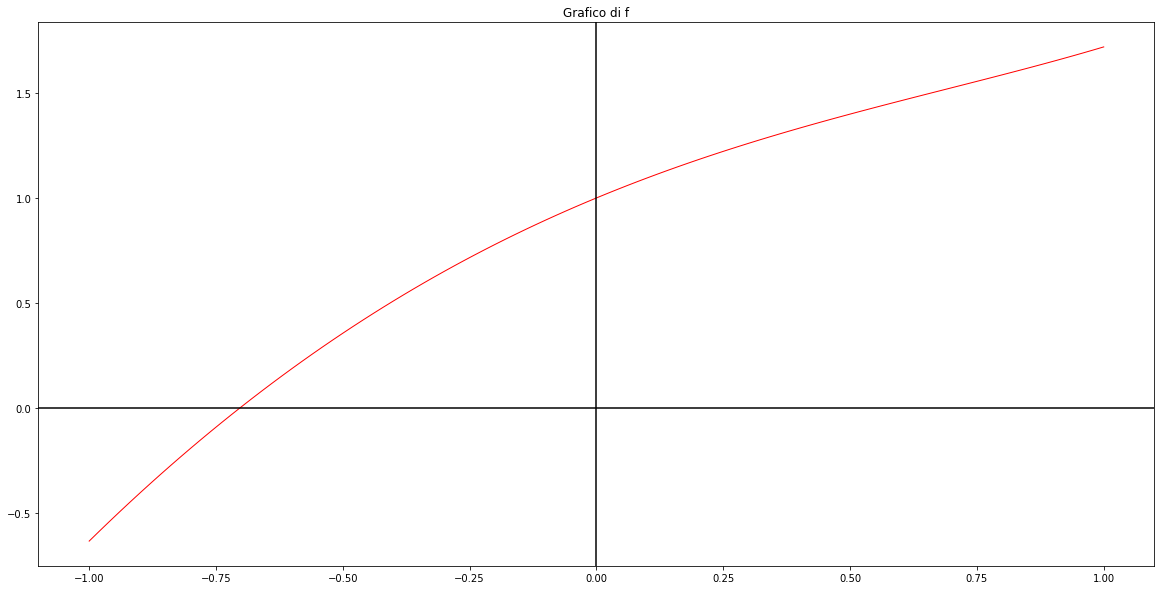

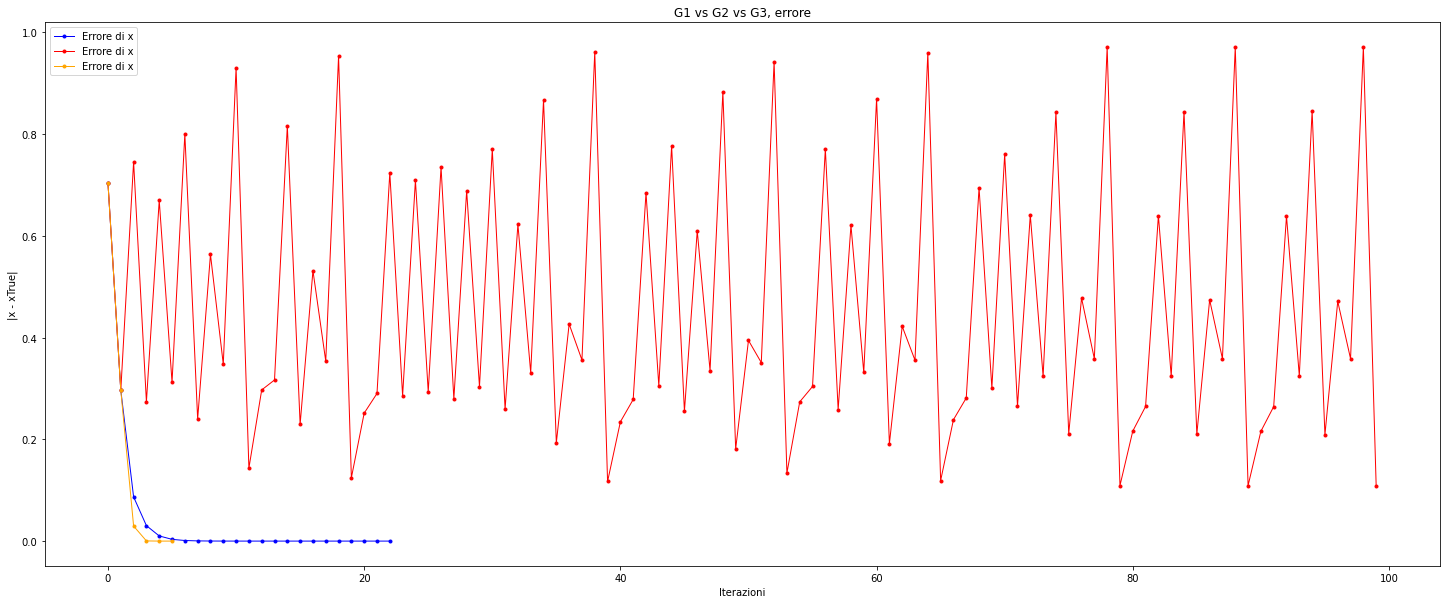

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Metodo delle approssimazioni successive
def succ_app(f, g, tolf, tolx, maxit, xTrue, x0 = 0):
    err = np.zeros(maxit + 1, dtype = np.float64)
    err[0] = tolx + 1
    vecErrore = np.zeros(maxit + 1, dtype = np.float64)
    vecErrore[0] = np.abs(x0 - xTrue)
  
  
    i = 0
    x = x0

    while ((abs(f(x)) > tolf or err[i] > tolx) and i < maxit):
        x_new = g(x)
        err[i + 1] = abs(x_new - x)
        vecErrore[i + 1] = abs(x_new - xTrue)

        i = i + 1
        x = x_new
    
    err = err[0:i]
    vecErrore = vecErrore[0:i]
    return (x, i, err, vecErrore)


# Creazione del problema
f = lambda x: math.e ** x - x ** 2
df = lambda x: math.e ** x - 2 * x

g1 = lambda x: x - f(x) * math.e ** (x / 2)
g2 = lambda x: x - f(x) * math.e ** (- x / 2)
g3 = lambda x: x - f(x) / df(x)

xTrue = -0.7034674
yTrue = f(xTrue)
print('Valori esatti \n xTrue =', xTrue, '\n yTrue =', yTrue)

tolx = 1.e-10
tolf = 1.e-6
maxit = 100
x0 = 0

# Grafico funzione in [-1, 1]
x_plot = np.linspace(-1, 1, 101)
f_plot = np.array([f(x) for x in x_plot])

plt.figure(figsize=(20, 10))
plt.title('Grafico di f')
plt.plot(x_plot, f_plot, color='red', linewidth=1)
plt.axhline(0, color='black')
plt.axvline(0, color='black')



# Calcolo soluzione con g1, g2 e g3

(x1, i1, err1, vecErrore1) = succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =', x1,'\n iter_1=', i1)

(x2, i2, err2, vecErrore2) = succ_app(f, g2, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g2 \n x =', x2,'\n iter_2=', i2)

(x3, i3, err3, vecErrore3) = succ_app(f, g3, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g3 \n x =', x3, '\n iter_3=', i3)


# Grafico Errore vs Iterazioni

plt.figure(figsize = (25, 10))

plt.title('G1 vs G2 vs G3, errore')
plt.plot(vecErrore1, label='Errore di x', color='blue', linewidth=1, marker='.')
plt.plot(vecErrore2, label='Errore di x', color='red', linewidth=1, marker='.')
plt.plot(vecErrore3, label='Errore di x', color='orange', linewidth=1, marker='.')
plt.legend(loc='best')
plt.ylabel('|x - xTrue|')
plt.xlabel('Iterazioni')

plt.show()


## Esercizio 3
Confrontare e commentare le prestazioni dei tre metodi con le seguenti funzioni:
- $f(x) = x^3 + 4x cos(x) − 2$ nell’intervallo $[0, 2]$, con $g(x) = \frac{2−x^3}{4cos(x)}$
- $f(x) = x − x^{1/3} − 2$ nell’intervallo $[3, 5]$, con $g(x) = x^{1/3} + 2$

*Suggerimento: confronta il numero di iterazioni, i tempi di esecuzione e i risultati ottenuti. Analizza la dipendenza dai parametri, dagli intervalli o dalle funzioni.*

*Suggerimento: usa diversi valori iniziali, per discussione*

-----------------------------------------
Valori esatti 
 xTrue = 0.536839 
 yTrue = 1.4366462846027162e-06
Metodo di bisezione 
 x = 0.5368385516339913 
 iter_bise= 34 
 iter_max= 35
Metodo di Newton 
 x = 0.5368385515667755 
 iter_new= 4 
 err_new= [1.00000000e+00 3.62973292e-02 5.41098351e-04 1.24038071e-07]
Metodo approssimazioni successive 
 x = 0.5368385515655376 
 iter_1= 9


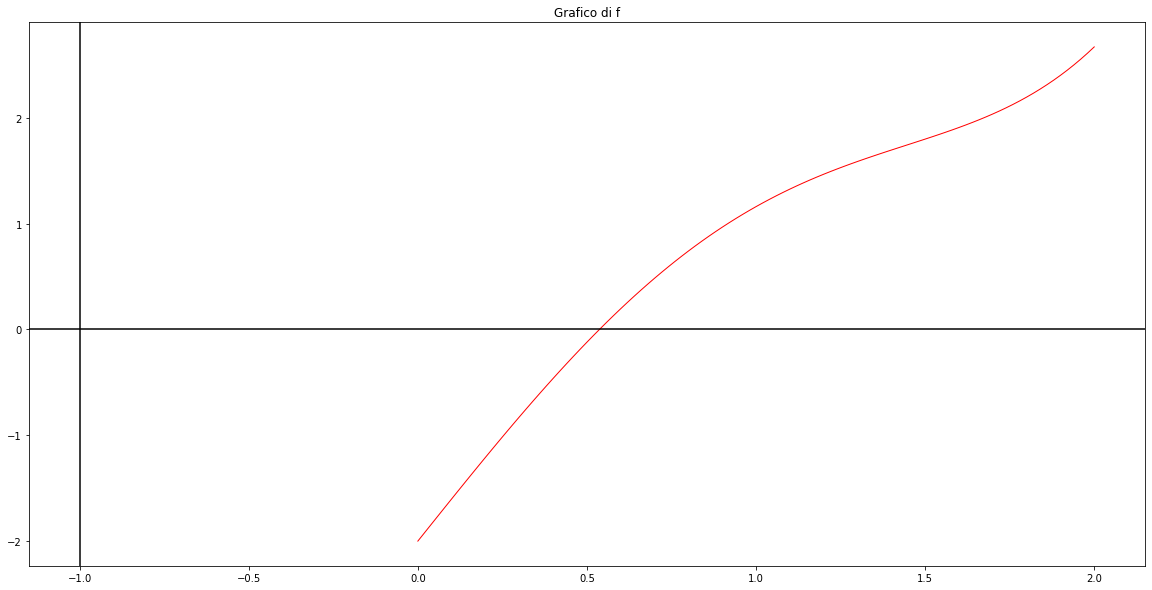

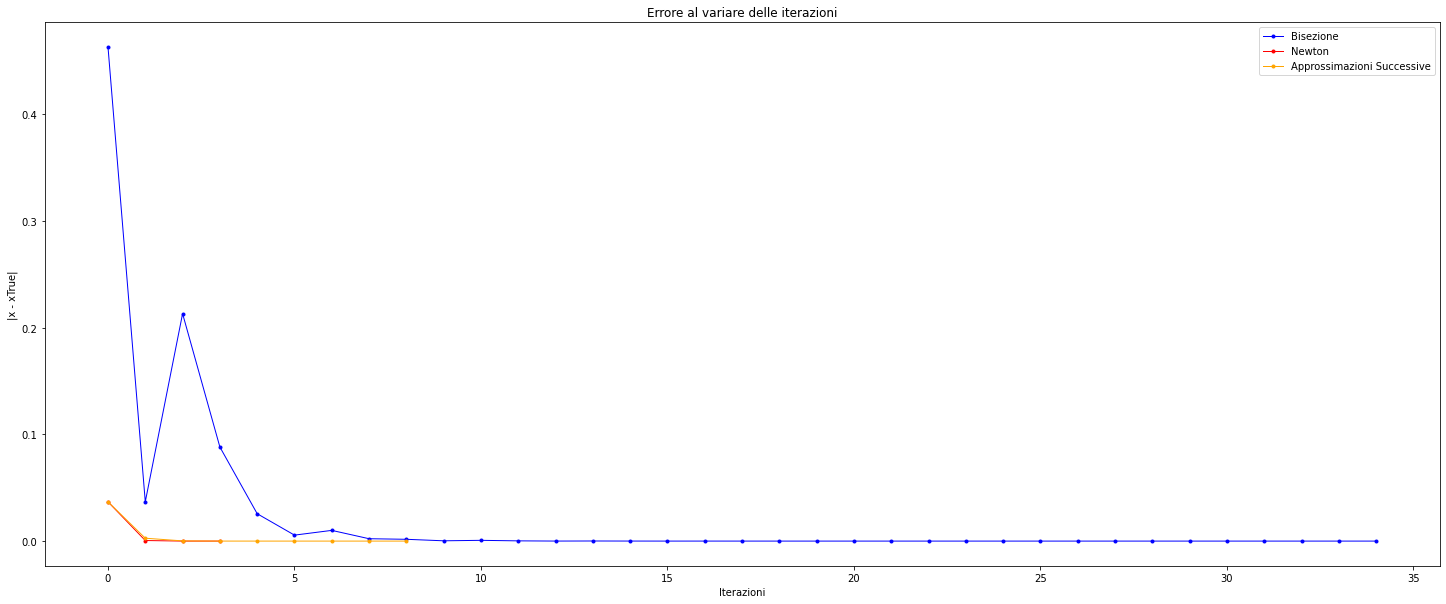

Tempo Bisezione: 0.00027489662170410156 secondi
Tempo Newton: 6.246566772460938e-05 secondi
Tempo Approssimazioni Successive: 4.553794860839844e-05 secondi
-----------------------------------------
Valori esatti 
 xTrue = 3.5214 
 yTrue = 1.7370704914476676e-05
Metodo di bisezione 
 x = 3.5213797067990527 
 iter_bise= 34 
 iter_max= 35
Metodo di Newton 
 x = 3.521379706804568 
 iter_new= 5 
 err_new= [1.00000000e+00 4.87123510e+00 1.81747416e+00 3.23647161e-02
 1.65129807e-05]
Metodo approssimazioni successive 
 x = 3.5213797067954618 
 iter_1= 14


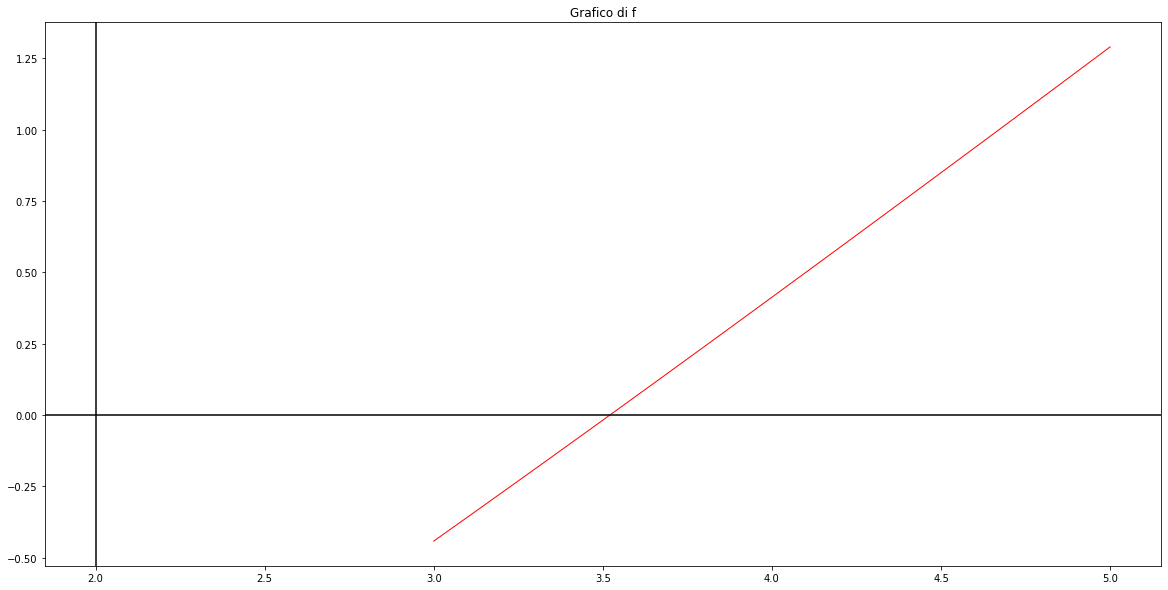

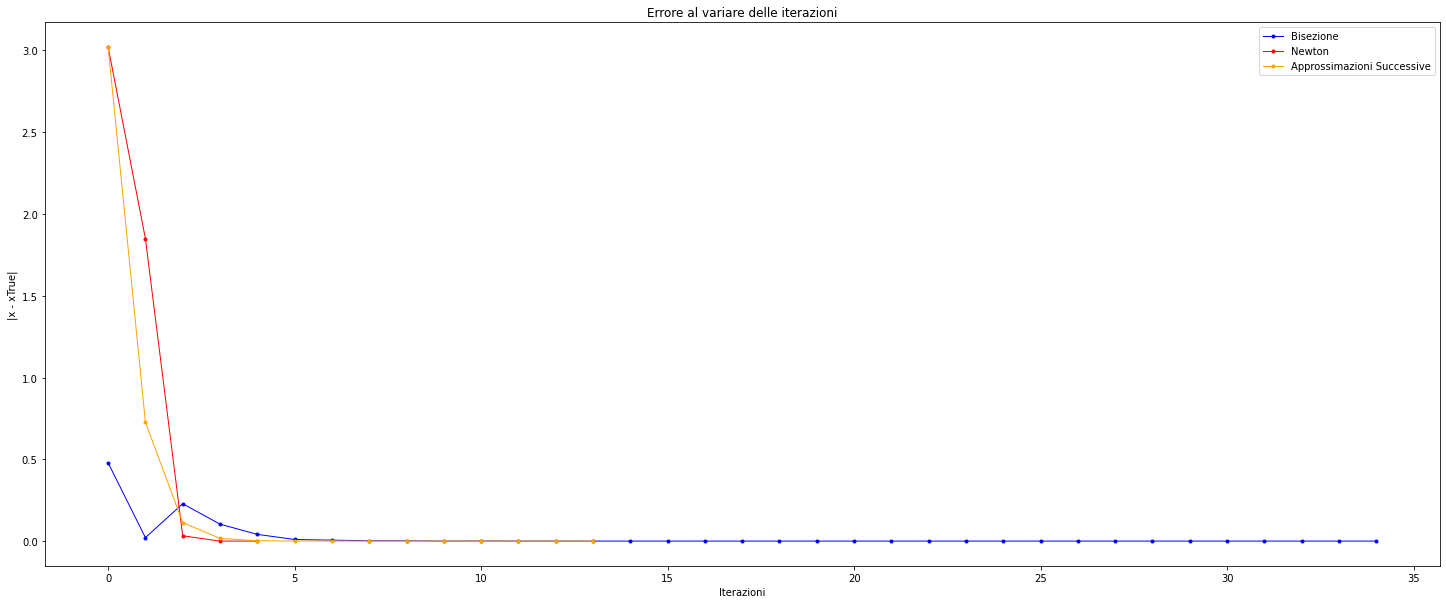

Tempo Bisezione: 0.00024008750915527344 secondi
Tempo Newton: 5.5789947509765625e-05 secondi
Tempo Approssimazioni Successive: 5.14984130859375e-05 secondi


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time


# Metodo di Bisezione
def bisezione(a, b, f, tolx, xTrue):
    k = math.ceil(math.log2((b - a) / tolx))              # numero minimo di iterazioni per avere un errore minore di tolx
    
    vecErrore = np.zeros( (k, 1) )

    if f(a) * f(b) > 0:
        print("Non esiste uno zero di funzione (se f continua)")
        return ()

    for i in range(1, k):
        c = a + (b - a) / 2
        fc = f(c)
        vecErrore[i-1] = abs(c - xTrue)

        if abs(fc) < 1.e-16:             # 10 ^ -16 è la precisione macchina, non meno di questo
            x = c                             # se f(c) è molto vicino a 0 
            print("f(c) è molto vicino a 0")
            return (x, i, k, vecErrore)
        else:
          if np.sign(f(a)) * np.sign((f(c))) < 0:
            b = c
          else:
            a = c
        x = c

    return (x, i, k, vecErrore)

      
# Metodo di Newton
def newton(f, df, tolf, tolx, maxit, xTrue, x0 = 0):
    err = np.zeros(maxit, dtype = float)
    err[0] = tolx+1
    vecErrore = np.zeros((maxit, 1), dtype = float)
    vecErrore[0] = np.abs(x0 - xTrue)
    
    x = x0
    i = 0
    while ((abs(f(x)) > tolf or err[i] > tolx) and i < maxit):
        x_new = x - f(x) / df(x)
        err[i + 1] = abs(x_new - x)
        vecErrore[i + 1] = abs(x_new - xTrue)

        i = i + 1
        x = x_new

    err = err[0:i]
    vecErrore = vecErrore[0:i]
    return (x, i, err, vecErrore)  

# Metodo delle approssimazioni successive
def succ_app(f, g, tolf, tolx, maxit, xTrue, x0 = 0):
    err = np.zeros(maxit + 1, dtype = np.float64)
    err[0] = tolx + 1
    vecErrore = np.zeros(maxit + 1, dtype = np.float64)
    vecErrore[0] = np.abs(x0 - xTrue)
  
  
    i = 0
    x = x0

    while ((abs(f(x)) > tolf or err[i] > tolx) and i < maxit):
        x_new = g(x)
        err[i + 1] = abs(x_new - x)
        vecErrore[i + 1] = abs(x_new - xTrue)

        i = i + 1
        x = x_new
    
    err = err[0:i]
    vecErrore = vecErrore[0:i]
    return (x, i, err, vecErrore)

# Test dei vari problemi
def problemaTest(f, df, g, xTrue, a, b, tolx, tolf, maxit, x0 = 0):
    print('-----------------------------------------')
    print('Valori esatti \n xTrue =', xTrue, '\n yTrue =', f(xTrue))

    # Grafico funzione in [a, b]
    x_plot = np.linspace(a, b, maxit+1)
    f_plot = np.array([f(x) for x in x_plot])
    plt.figure(figsize=(20, 10))
    plt.title('Grafico di f')
    plt.plot(x_plot, f_plot, color='red', linewidth=1)
    plt.axhline(0, color='black')
    plt.axvline(min(b, a) - 1, color='black')

    # Calcolo soluzione tramite Bisezione, Newton e approssimazioni successive
    timeBis = time.time()
    (xBis, iBis, kBis, vecErroreBis) = bisezione(a, b, f, tolx, xTrue)
    timeBis = time.time() - timeBis
    print('Metodo di bisezione \n x =', xBis, '\n iter_bise=', iBis, '\n iter_max=', kBis)

    timeNew = time.time()
    (xNew, iNew, errNew, vecErroreNew) = newton(f, df, tolf, tolx, maxit, xTrue, x0)
    timeNew = time.time() - timeNew
    print('Metodo di Newton \n x =', xNew,'\n iter_new=', iNew, '\n err_new=', errNew)

    timeSucc = time.time()
    (xSucc, iSucc, errSucc, vecErroreSucc) = succ_app(f, g, tolf, tolx, maxit, xTrue, x0)
    timeSucc = time.time() - timeSucc
    print('Metodo approssimazioni successive \n x =', xSucc,'\n iter_1=', iSucc)
    
    # Grafico Errore
    plt.figure(figsize = (25, 10))

    plt.title('Errore al variare delle iterazioni')
    plt.plot(vecErroreBis, label='Bisezione', color='blue', linewidth=1, marker='.')
    plt.plot(vecErroreNew, label='Newton', color='red', linewidth=1, marker='.')
    plt.plot(vecErroreSucc, label='Approssimazioni Successive', color='orange', linewidth=1, marker='.')
    plt.legend(loc='best')
    plt.ylabel('|x - xTrue|')
    plt.xlabel('Iterazioni')

    plt.show()

    # Tempo impiegato

    print('Tempo Bisezione:', timeBis, 'secondi')
    print('Tempo Newton:', timeNew, 'secondi')
    print('Tempo Approssimazioni Successive:', timeSucc, 'secondi')



# $f(x) = x^3 + 4x cos(x) − 2$ nell’intervallo $[0, 2]$, con $g(x) = \frac{2−x^3}{4cos(x)}$
f = lambda x: x ** 3 + 4 * x * math.cos(x) - 2
df = lambda x: 3 * x ** 2 + 4 * (math.cos(x) - x * math.sin(x))
g = lambda x: (2 - x ** 3) / (4 * math.cos(x))

xTrue = 0.536839
yTrue = f(xTrue)

a = 0.0
b = 2.0
tolx = 1.e-10
tolf = 1.e-6
maxit = 100
x0 = 0.5

problemaTest(f, df, g, xTrue, a, b, tolx, tolf, maxit, x0)


# $f(x) = x − x^{1/3} − 2$ nell’intervallo $[3, 5]$, con $g(x) = x^{1/3} + 2$
f = lambda x: x - x ** (1/3) - 2
df = lambda x: 1 - 1/(3 * x ** (2/3))
g = lambda x: x ** (1/3) + 2

xTrue = 3.5214
yTrue = f(xTrue)

a = 3.0
b = 5.0
tolx = 1.e-10
tolf = 1.e-6
maxit = 100
x0 = 0.5

problemaTest(f, df, g, xTrue, a, b, tolx, tolf, maxit, x0)

# Metodo del gradiente per l’ottimizzazione in $\mathbb{R}^2$

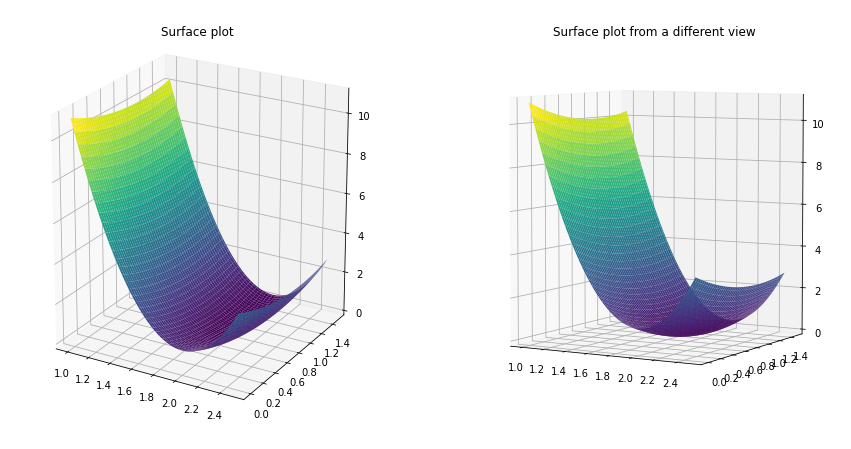

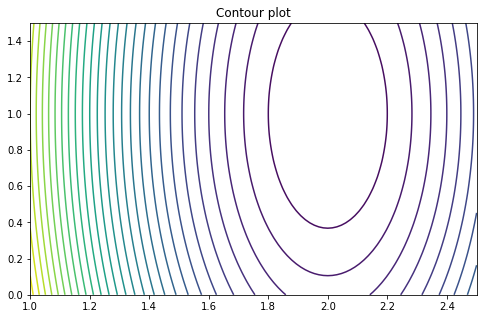

In [ ]:
######## ESEMPIO GENERAZIONE SUPERFICI PYTHON

import numpy as np
import matplotlib.pyplot as plt


def f(x,y):
    return 10*(x-2)**2 + 1*(y-1)**2

#f = lambda x,y: 10*(x-2)**2 + 10*(y-1)**2

x = np.linspace(1,2.5,100)
y = np.linspace(0,1.5, 100)
X, Y = np.meshgrid(x, y)
Z=f(X,Y)

plt.figure(figsize=(15, 8))

ax1 = plt.subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_title('Surface plot')
ax1.view_init(elev=20)

ax2 = plt.subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis')
ax2.set_title('Surface plot from a different view')
ax2.view_init(elev=5)
plt.show()

plt.figure(figsize=(8, 5))

contours = plt.contour(X, Y, Z, levels=30)
plt.title('Contour plot')
plt.show()


##Esercizio 4
Scrivere una funzione che implementi il metodo del gradiente con step size $\alpha_k$ variabile, calcolato secondo la procedura di backtracking ad ogni iterazione k-esima.

Testare la function per minimizzare $f(x)$ definita come:

$$f (x) = 10(x − 1)^2 + (y − 2)^2$$

In particolare:
1. Plottare la superficie $f(x)$ con `plt.plot_surface()`.
2. Plottare le curve di livello (`plt.contour()`) e le iterate calcolate dal metodo.
3. Plottare, al variare delle iterazioni, la funzione obiettivo, l’errore e la
norma del gradiente.

iterations = 60
last guess: x = (1.000000, 1.999997)


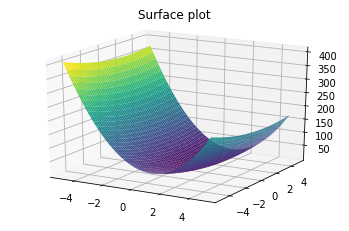

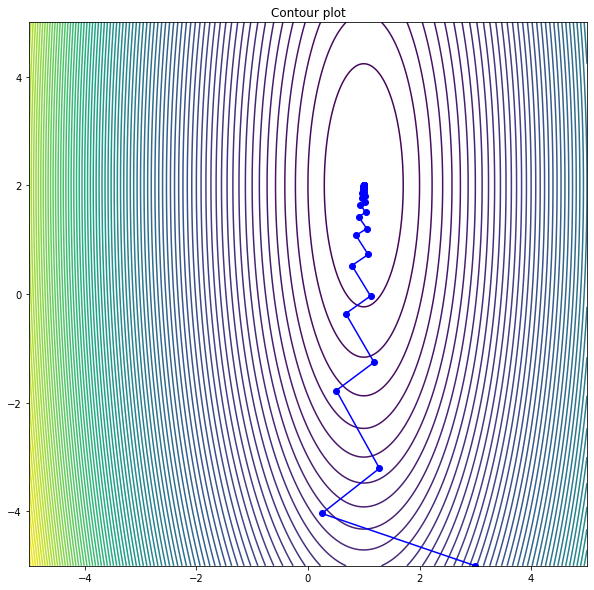

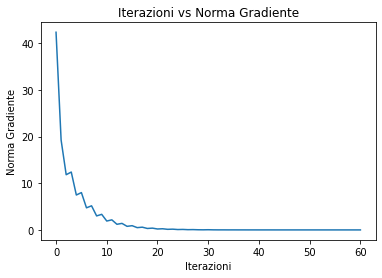

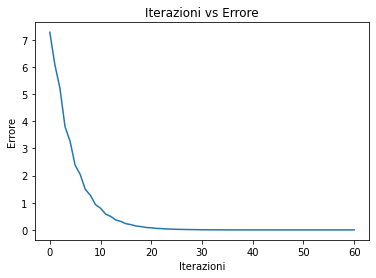

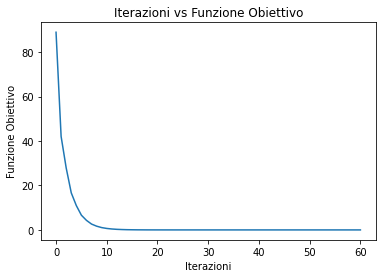

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


def next_step(x, grad): # backtracking procedure for the choice of the steplength
  alpha = 1.1
  rho = 0.5
  c1 = 0.25
  p = -grad
  j = 0
  jmax = 100
  while (f(x + alpha * p) > f(x) + c1 * alpha * grad.T @ p):
    alpha = rho * alpha
    j = j + 1
  if (j >= jmax): # se termino il while, perchè? alpha va bene vs cicli max raggiunti
    return -1
  
  return alpha
    

def minimize(x0, x_true, mode, step, MAXITERATION, ABSOLUTE_STOP):
  x = np.zeros((2, MAXITERATION))
  norm_grad_list = np.zeros((1, MAXITERATION))
  function_eval_list = np.zeros((1, MAXITERATION))
  error_list = np.zeros((1, MAXITERATION))
  
  k = 0
  x_last = np.array([x0[0], x0[1]])
  x[ : , k] = x_last
  function_eval_list[ : , k] = abs(f(x_last))
  error_list[ : , k] = np.linalg.norm(x_last - x_true)
  norm_grad_list[ : , k] = np.linalg.norm(grad_f(x_last))
 
  while (np.linalg.norm(grad_f(x_last)) > ABSOLUTE_STOP and k < MAXITERATION):
      k = k + 1
      grad = grad_f(x_last)
      
      # backtracking step
      step = next_step(x_last, grad)
    
      if (step == -1): # alpoha troppo piccolo o jmax superato
          print('alpha troppo piccolo, non converge')

      x_last = x_last - step * grad
      
      x[ : , k] = x_last
      function_eval_list[ : , k] = abs(f(x_last))
      error_list[ : , k] = np.linalg.norm(x_last - x_true)
      norm_grad_list[ : , k] = np.linalg.norm(grad_f(x_last))

  function_eval_list = function_eval_list[ : , : k+1]
  error_list = error_list[ : , : k+1]
  norm_grad_list = norm_grad_list[ : , : k+1]
  x = x[ : , : k+1]
  
  print('iterations =', k)
  print('last guess: x = (%f, %f)' %(x[0,k], x[1,k]))
 
  if (mode == 'plot_history'):
      return (x_last, norm_grad_list, function_eval_list, error_list, k, x)
  
  else:
      return (x_last, norm_grad_list, function_eval_list, error_list, k)





### creazione del problema
x_true = np.array([1, 2])

def f(x):
  return 10 * (x[0] - 1)**2 + (x[1] - 2)**2

def grad_f(x):
  return np.array((20.0 * (x[0] - 1), 2 * (x[1] - 2)))

step = 0.1
MAXITERATIONS = 1000
ABSOLUTE_STOP = 1e-5
mode = 'plot_history'
x0 = np.array((3,-5))


### minimize
(x_last, norm_grad_list, function_eval_list, error_list, k, x) = minimize(x0, x_true, mode, step, MAXITERATIONS, ABSOLUTE_STOP)

### Grafico bello TODO, DA FINIRE
v_x0 = np.linspace(-5, 5, 500)
v_x1 = np.linspace(-5, 5, 500)

x0v, x1v = np.meshgrid(v_x0, v_x1)
z = f([x0v, x1v])

# superficie
plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(x0v, x1v, z, cmap = 'viridis')
ax.set_title('Surface plot')
ax.view_init(elev = 20)
plt.show()


# contour plots
plt.figure(figsize = (10, 10))
if (mode == 'plot_history'):
  contours = plt.contour(x0v, x1v, z, levels = 100)
plt.plot(x[0], x[1], 'bo-')
plt.title('Contour plot')
plt.show()

### plots

# Iterazioni vs Norma Gradiente
plt.figure()
plt.plot(norm_grad_list[0])
plt.xlabel('Iterazioni')
plt.ylabel('Norma Gradiente')
plt.title('Iterazioni vs Norma Gradiente')

# Iterazioni vs Errore
plt.figure()
plt.plot(error_list[0])
plt.xlabel('Iterazioni')
plt.ylabel('Errore')
plt.title('Iterazioni vs Errore')

# Iterazioni vs Funzione Obiettivo
plt.figure()
plt.plot(function_eval_list[0])
plt.xlabel('Iterazioni')
plt.ylabel('Funzione Obiettivo')
plt.title('Iterazioni vs Funzione Obiettivo')

plt.show()

## Esercizio 5
Minimizzare la seguente funzione utilizzando il metodo del gradiente con step
size $\alpha_k$ variabile:

$$f(x) = ||x − b||^2_2 + \lambda ||x||^2_2$$

dove:
- $x$, $b \in \mathbb{R}^n$.
- $b = (1, \dots, 1)$.
- $\lambda > 0, \lambda \in \mathbb{R}$.

In particolare per $n$ fissato:
1. Testare differenti valori di $\lambda$.
2. Plottare, al variare delle iterazioni, la funzione obiettivo, l’errore e la
norma del gradiente.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math


def next_step(x, grad, lamd): # backtracking procedure for the choice of the steplength
  alpha = 1.1
  rho = 0.5
  c1 = 0.25
  p = -grad
  j = 0
  jmax = 100
  print(grad)
  print(p)
  while (f(x + alpha * p, lamd) > f(x, lamd) + c1 * alpha * grad.T @ p):
    alpha = rho * alpha
    j = j + 1
  if (j >= jmax): # se termino il while, perchè? alpha va bene vs cicli max raggiunti
    return -1
  
  return alpha
    

def minimize(x0, x_true, mode, step, MAXITERATION, ABSOLUTE_STOP, lamd):
  x = np.zeros((2, MAXITERATION))
  norm_grad_list = np.zeros((1, MAXITERATION))
  function_eval_list = np.zeros((1, MAXITERATION))
  error_list = np.zeros((1, MAXITERATION))
  
  k = 0
  x_last = np.array([x0[0], x0[1]])
  x[ : , k] = x_last
  function_eval_list[ : , k] = abs(f(x_last, lamd))
  error_list[ : , k] = np.linalg.norm(x_last - x_true)
  norm_grad_list[ : , k] = np.linalg.norm(grad_f(x_last, lamd))
 
  while (np.linalg.norm(grad_f(x_last, lamd)) > ABSOLUTE_STOP and k < MAXITERATION):
      k = k + 1
      grad = grad_f(x_last, lamd)
      
      # backtracking step
      step = next_step(x_last, grad, lamd)
    
      if (step == -1): # alpha troppo piccolo o jmax superato
          print('alpha troppo piccolo, non converge')

      x_last = x_last - step * grad
      
      x[ : , k] = x_last
      function_eval_list[ : , k] = abs(f(x_last, lamd))
      error_list[ : , k] = np.linalg.norm(x_last - x_true)
      norm_grad_list[ : , k] = np.linalg.norm(grad_f(x_last, lamd))

  function_eval_list = function_eval_list[ : , : k+1]
  error_list = error_list[ : , : k+1]
  norm_grad_list = norm_grad_list[ : , : k+1]
  x = x[ : , : k+1]
  
  print('iterations =', k)
  print('last guess: x = (%f, %f)' %(x[0,k], x[1,k]))
 
  if (mode == 'plot_history'):
      return (x_last, norm_grad_list, function_eval_list, error_list, k, x)
  
  else:
      return (x_last, norm_grad_list, function_eval_list, error_list, k)





### creazione del problema
x_true = np.array([1, 2])

def f(x, lam):
  return np.linalg.norm(x - np.ones(np.shape(x)), 2) ** 2 + lam * np.linalg.norm(x, 2) ** 2

def grad_f(x, lam):
  return 0 # TODO

step = 0.1
MAXITERATIONS = 1000
ABSOLUTE_STOP = 1e-5
mode = 'plot_history'
x0 = np.array((3,-5))

print(x0, x0.shape)

lamd = 0.3

### minimize
(x_last, norm_grad_list, function_eval_list, error_list, k, x) = minimize(x0, x_true, mode, step, MAXITERATIONS, ABSOLUTE_STOP, lamd)

### Grafico bello TODO, DA FINIRE
v_x0 = np.linspace(-5, 5, 500)
v_x1 = np.linspace(-5, 5, 500)

x0v, x1v = np.meshgrid(v_x0, v_x1)
z = f([x0v, x1v], lamd)

# superficie
plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(x0v, x1v, z, cmap = 'viridis')
ax.set_title('Surface plot')
ax.view_init(elev = 20)
plt.show()


# contour plots
plt.figure(figsize = (10, 10))
if (mode == 'plot_history'):
  contours = plt.contour(x0v, x1v, z, levels = 100)
plt.plot(x[0], x[1], 'bo-')
plt.title('Contour plot')
plt.show()

### plots

# Iterazioni vs Norma Gradiente
plt.figure()
plt.plot(norm_grad_list[0])
plt.xlabel('Iterazioni')
plt.ylabel('Norma Gradiente')
plt.title('Iterazioni vs Norma Gradiente')

# Iterazioni vs Errore
plt.figure()
plt.plot(error_list[0])
plt.xlabel('Iterazioni')
plt.ylabel('Errore')
plt.title('Iterazioni vs Errore')

# Iterazioni vs Funzione Obiettivo
plt.figure()
plt.plot(function_eval_list[0])
plt.xlabel('Iterazioni')
plt.ylabel('Funzione Obiettivo')
plt.title('Iterazioni vs Funzione Obiettivo')

[ 3 -5] (2,)
iterations = 0
last guess: x = (3.000000, -5.000000)


ValueError: ignored